# QMatrix || Epoch Laboratory

The goal of this game is to go from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, so you won't always move in the direction you intend (stochastic environment)

In [1]:
%pylab inline
import gym, time

Populating the interactive namespace from numpy and matplotlib


### Define environment

In [2]:
ENV_NAME = 'FrozenLake-v0'

In [3]:
env = gym.make(ENV_NAME)

In [4]:
env.seed(123)
env.reset()

0

### Q-Table

Create a Q-table, to identify the number of rows (states) and columns (actions), calculate the action_size and the state_size of the environment.

In [5]:
num_states = env.observation_space.n
num_actions = env.action_space.n

print('States:', num_states)
print('Actions:', num_actions)

States: 16
Actions: 4


In [6]:
#Empty Table
Q = np.zeros((num_states, num_actions))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Q-Algorithm

In [7]:
#Hyperparameters
episodes = 20000          # Total episodes
max_steps = 99            # Max steps per episode

learning_rate = 0.7       # Learning rate
gamma = 0.95              # Discount factor

epsilon = 1.0             # Exploration rate
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

RENDER = False

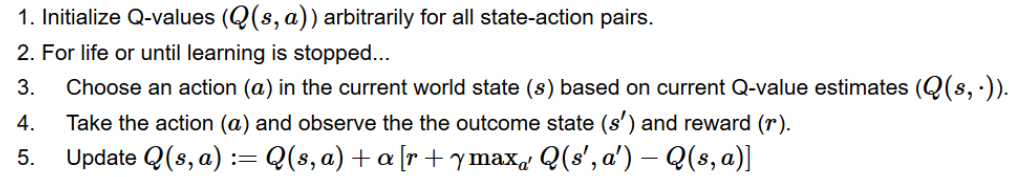

In [8]:
rewards = []

for episode in range(episodes):
    state = env.reset()
    step = 0
    done = False
    total_reward = 0
    
    for step in range(max_steps):
        
        if RENDER:
            env.render()
        
        # If random number is less than epsilon do random action.
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        # Take action and observe state and reward
        n_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state, action] = Q[state, action] + learning_rate * (reward + gamma * np.max(Q[n_state, :]) - Q[state, action])
        
        total_reward += reward
        state = n_state
        
        if done == True:
            rewards.append(total_reward)
            #epsilon -= 0.001
            break # reached goal
            
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    print(epsilon)
    
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
print(f"Reward over time: {sum(rewards)/episodes}:")

1.0
0.9950623544007555
0.9901493354116764
0.985260820207032
0.9803966865736877
0.9755568129080493
0.970741078213023
0.9659493620949908
0.9611815447608
0.9564375070147689
0.9517171302557069
0.947020296473949
0.9423468882484062
0.9376967887436294
0.9330698817068888
0.9284660514652673
0.9238851829227694
0.9193271615574428
0.9147918734185159
0.9102792051235491
0.9057890438555999
0.9013212773604029
0.896875793943563
0.892452482467763
0.888051232349986
0.8836719335587495
0.8793144766113556
0.8749787525711541
0.8706646530448178
0.8663720701796339
0.8621008966608072
0.8578510257087774
0.8536223510765493
0.8494147670470367
0.8452281684304199
0.8410624505615153
0.8369175092971592
0.8327932410136044
0.8286895426039287
0.8246063114754583
0.820543445547202
0.8165008432473004
0.8124784035104852
0.8084760257755536
0.8044936099828537
0.8005310565717833
0.7965882664783007
0.7926651411324482
0.7887615824558879
0.7848774928594494
0.7810127752406908
0.7771673329814701
0.7733410699455306
0.7695338904760971

0.10162507173523985
0.10116808978348833
0.10071338703872978
0.10026095213337187
0.09981077375651838
0.09936284065368642
0.09891714162652515
0.09847366553253566
0.09803240128479247
0.09759333785166639
0.09715646425654882
0.09672176957757705
0.09628924294736148
0.09585887355271383
0.09543065063437678
0.09500456348675515
0.09458060145764802
0.09415875394798257
0.09373901041154904
0.09332136035473725
0.092905793336274
0.09249229896696216
0.09208086690942092
0.09167148687782753
0.0912641486376598
0.09085884200544052
0.09045555684848275
0.09005428308463662
0.08965501068203711
0.08925772965885333
0.08886243008303903
0.08846910207208424
0.08807773579276819
0.08768832146091352
0.08730084934114159
0.08691530974662932
0.08653169303886674
0.08614998962741616
0.0857701899696724
0.08539228457062421
0.08501626398261702
0.08464211880511648
0.0842698396844737
0.0838994173136912
0.08353084243219053
0.08316410582558038
0.08279919832542652
0.08243611080902238
0.08207483419916123
0.08171535946390894
0.0813

0.012187381011721598
0.012176471403412107
0.012165616207001056
0.012154815151107974
0.0121440679657059
0.012133374382114637
0.012122734132994042
0.012112146952337331
0.012101612575464436
0.012091130739015387
0.012080701180943726
0.012070323640509958
0.012059997858275034
0.012049723576093858
0.012039500537108838
0.012029328485743472
0.012019207167695944
0.012009136329932777
0.0119991157206825
0.01198914508942936
0.011979224186907058
0.011969352765092513
0.011959530577199663
0.011949757377673304
0.011940032922182937
0.01193035696761667
0.011920729272075131
0.011911149594865432
0.011901617696495144
0.011892133338666311
0.011882696284269492
0.01187330629737784
0.011863963143241188
0.011854666588280199
0.011845416400080515
0.011836212347386948
0.011827054200097702
0.011817941729258619
0.01180887470705745
0.011799852906818169
0.011790876102995302
0.011781944071168286
0.011773056588035857
0.011764213431410478
0.011755414380212768
0.011746659214465993
0.011737947715290551
0.011729279664898506


0.010044055941412194
0.010043836211487715
0.010043617577470805
0.010043400033895604
0.010043183575323512
0.010042968196343052
0.010042753891569738
0.01004254065564594
0.01004232848324075
0.010042117369049844
0.010041907307795358
0.01004169829422575
0.01004149032311567
0.010041283389265828
0.010041077487502869
0.010040872612679235
0.010040668759673048
0.01004046592338797
0.010040264098753086
0.010040063280722766
0.010039863464276553
0.010039664644419022
0.010039466816179668
0.010039269974612772
0.010039074114797288
0.01003887923183671
0.01003868532085895
0.01003849237701623
0.010038300395484938
0.010038109371465528
0.01003791930018239
0.010037730176883732
0.01003754199684146
0.010037354755351065
0.0100371684477315
0.010036983069325062
0.010036798615497286
0.010036615081636812
0.010036432463155286
0.010036250755487239
0.010036069954089965
0.010035890054443422
0.01003571105205011
0.010035532942434958
0.01003535572114522
0.01003517938375035
0.010035003925841906
0.010034829343033432
0.01003

0.010005209376745943
0.010005183394871029
0.010005157542581257
0.010005131819230318
0.010005106224175128
0.010005080756775806
0.01000505541639567
0.010005030202401208
0.010005005114162066
0.01000498015105104
0.01000495531244405
0.010004930597720129
0.010004906006261407
0.010004881537453098
0.010004857190683478
0.01000483296534388
0.010004808860828666
0.010004784876535224
0.010004761011863943
0.010004737266218209
0.010004713639004376
0.010004690129631762
0.010004666737512635
0.010004643462062188
0.010004620302698535
0.01000459725884269
0.010004574329918555
0.010004551515352907
0.01000452881457538
0.010004506227018452
0.010004483752117436
0.010004461389310455
0.01000443913803844
0.010004416997745106
0.010004394967876947
0.010004373047883213
0.010004351237215905
0.010004329535329752
0.010004307941682208
0.010004286455733433
0.010004265076946272
0.010004243804786258
0.010004222638721584
0.010004201578223099
0.010004180622764288
0.010004159771821263
0.01000413902487275
0.010004118381400076


0.01000019504211334
0.010000194069336742
0.010000193101411887
0.010000192138314577
0.010000191180020735
0.010000190226506403
0.010000189277747745
0.01000018833372104
0.010000187394402687
0.010000186459769205
0.010000185529797227
0.010000184604463502
0.010000183683744899
0.0100001827676184
0.010000181856061099
0.01000018094905021
0.010000180046563058
0.010000179148577079
0.010000178255069823
0.010000177366018954
0.010000176481402244
0.010000175601197578
0.01000017472538295
0.010000173853936468
0.010000172986836342
0.010000172124060897
0.010000171265588562
0.010000170411397875
0.010000169561467482
0.010000168715776135
0.01000016787430269
0.010000167037026114
0.01000016620392547
0.010000165374979933
0.01000016455016878
0.010000163729471389
0.010000162912867244
0.010000162100335929
0.010000161291857131
0.010000160487410637
0.010000159686976337
0.01000015889053422
0.010000158098064375
0.01000015730954699
0.01000015652496235
0.010000155744290843
0.010000154967512952
0.010000154194609256
0.01

0.010000016251992247
0.010000016170935098
0.010000016090282223
0.010000016010031604
0.01000001593018124
0.010000015850729129
0.010000015771673287
0.01000001569301174
0.010000015614742517
0.010000015536863664
0.010000015459373233
0.010000015382269287
0.010000015305549899
0.01000001522921315
0.010000015153257132
0.010000015077679947
0.010000015002479705
0.010000014927654526
0.010000014853202538
0.010000014779121881
0.010000014705410704
0.01000001463206716
0.010000014559089422
0.01000001448647566
0.010000014414224061
0.01000001434233282
0.010000014270800136
0.010000014199624223
0.010000014128803303
0.010000014058335602
0.01000001398821936
0.010000013918452825
0.010000013849034251
0.010000013779961906
0.010000013711234058
0.010000013642848993
0.010000013574805
0.010000013507100378
0.010000013439733434
0.010000013372702484
0.010000013306005851
0.010000013239641871
0.010000013173608881
0.010000013107905234
0.010000013042529282
0.010000012977479397
0.010000012912753948
0.010000012848351319
0.

0.010000000266659025
0.010000000265329058
0.010000000264005724
0.010000000262688989
0.010000000261378822
0.010000000260075189
0.01000000025877806
0.010000000257487398
0.010000000256203175
0.010000000254925355
0.01000000025365391
0.010000000252388806
0.010000000251130011
0.010000000249877496
0.010000000248631227
0.010000000247391174
0.010000000246157305
0.01000000024492959
0.010000000243707998
0.0100000002424925
0.010000000241283063
0.01000000024007966
0.010000000238882256
0.010000000237690827
0.010000000236505338
0.010000000235325763
0.010000000234152071
0.010000000232984233
0.01000000023182222
0.010000000230666
0.01000000022951555
0.010000000228370836
0.01000000022723183
0.010000000226098508
0.010000000224970837
0.01000000022384879
0.01000000022273234
0.010000000221621458
0.010000000220516116
0.010000000219416287
0.010000000218321944
0.010000000217233058
0.010000000216149604
0.010000000215071555
0.01000000021399888
0.010000000212931556
0.010000000211869555
0.010000000210812852
0.01000

0.010000000003037305
0.010000000003022157
0.010000000003007084
0.010000000002992086
0.010000000002977164
0.010000000002962315
0.01000000000294754
0.010000000002932838
0.010000000002918211
0.010000000002903657
0.010000000002889175
0.010000000002874765
0.010000000002860427
0.010000000002846161
0.010000000002831966
0.01000000000281784
0.010000000002803787
0.010000000002789803
0.010000000002775889
0.010000000002762044
0.010000000002748267
0.010000000002734561
0.010000000002720923
0.010000000002707352
0.010000000002693849
0.010000000002680413
0.010000000002667044
0.010000000002653742
0.010000000002640506
0.010000000002627338
0.010000000002614234
0.010000000002601196
0.010000000002588222
0.010000000002575312
0.010000000002562468
0.010000000002549688
0.01000000000253697
0.010000000002524318
0.010000000002511727
0.0100000000024992
0.010000000002486735
0.010000000002474333
0.010000000002461993
0.010000000002449713
0.010000000002437495
0.010000000002425338
0.010000000002413242
0.0100000000024012

0.010000000000052653
0.01000000000005239
0.010000000000052129
0.01000000000005187
0.01000000000005161
0.010000000000051353
0.010000000000051096
0.010000000000050843
0.010000000000050588
0.010000000000050337
0.010000000000050085
0.010000000000049835
0.010000000000049587
0.01000000000004934
0.010000000000049093
0.010000000000048848
0.010000000000048605
0.010000000000048363
0.010000000000048121
0.010000000000047882
0.010000000000047643
0.010000000000047405
0.010000000000047169
0.010000000000046933
0.010000000000046699
0.010000000000046467
0.010000000000046234
0.010000000000046003
0.010000000000045774
0.010000000000045547
0.01000000000004532
0.010000000000045093
0.010000000000044869
0.010000000000044645
0.010000000000044421
0.010000000000044201
0.01000000000004398
0.01000000000004376
0.010000000000043542
0.010000000000043325
0.01000000000004311
0.010000000000042895
0.01000000000004268
0.010000000000042468
0.010000000000042255
0.010000000000042045
0.010000000000041835
0.010000000000041627
0

0.010000000000006545
0.010000000000006512
0.01000000000000648
0.010000000000006448
0.010000000000006415
0.010000000000006384
0.010000000000006353
0.01000000000000632
0.010000000000006289
0.010000000000006257
0.010000000000006226
0.010000000000006195
0.010000000000006164
0.010000000000006134
0.010000000000006103
0.010000000000006072
0.010000000000006042
0.010000000000006013
0.010000000000005982
0.010000000000005952
0.010000000000005923
0.010000000000005893
0.010000000000005864
0.010000000000005834
0.010000000000005805
0.010000000000005777
0.010000000000005747
0.01000000000000572
0.01000000000000569
0.010000000000005662
0.010000000000005633
0.010000000000005605
0.010000000000005577
0.01000000000000555
0.010000000000005522
0.010000000000005494
0.010000000000005466
0.01000000000000544
0.010000000000005413
0.010000000000005387
0.010000000000005359
0.010000000000005333
0.010000000000005305
0.010000000000005279
0.010000000000005253
0.010000000000005227
0.010000000000005201
0.01000000000000517

0.010000000000000111
0.01000000000000011
0.01000000000000011
0.01000000000000011
0.01000000000000011
0.010000000000000108
0.010000000000000108
0.010000000000000108
0.010000000000000106
0.010000000000000106
0.010000000000000106
0.010000000000000104
0.010000000000000104
0.010000000000000104
0.010000000000000103
0.010000000000000103
0.010000000000000103
0.010000000000000103
0.0100000000000001
0.0100000000000001
0.0100000000000001
0.010000000000000099
0.010000000000000099
0.010000000000000099
0.010000000000000099
0.010000000000000097
0.010000000000000097
0.010000000000000097
0.010000000000000096
0.010000000000000096
0.010000000000000096
0.010000000000000096
0.010000000000000094
0.010000000000000094
0.010000000000000094
0.010000000000000094
0.010000000000000092
0.010000000000000092
0.010000000000000092
0.01000000000000009
0.01000000000000009
0.01000000000000009
0.01000000000000009
0.010000000000000089
0.010000000000000089
0.010000000000000089
0.010000000000000089
0.010000000000000087
0.0100

0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.01000000000

0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


In [9]:
def get_average(values):
    return sum(values)/len(values)

In [10]:
avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

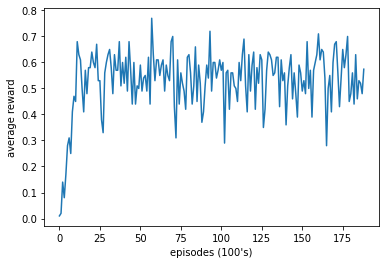

In [11]:
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

### Traverse environment using Q-Table predictions

In [12]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            
            print("Number of steps", step)
            break
            
        state = new_state
        
env.close()

****************************************************
EPISODE  0
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 28
****************************************************
EPISODE  1
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 56
****************************************************
EPISODE  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 36
****************************************************
EPISODE  3
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 51
****************************************************
EPISODE  4
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 31
